# 목표 :
###  Class와 def 으로 모듈화된 기계학습 프로세스를 학습 과정까지 구현해본다.

# 
### 4번 문제 : 
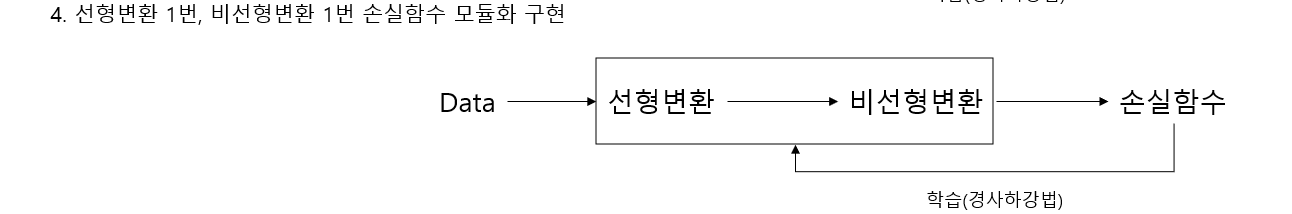

#### 4-1번 문제 : 다음을 만족하는 Sigmoid 비선형 변환을 클래스로 설계하세요
1. Sigmoid $z = \frac{1}{1+e^{-y}}$ 기능을 하는 forward 함수 설계
2. Sigmoid의 미분 : $\frac{\partial{z}}{\partial{y}} = z(1-z)$ 기능을 하는 backward 함수 설계
- 클래스 구현 후 y=0 에 대한 전파 출력값을 출력하세요

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Sigmoid :
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, y):
        self.x = y
        self.y = 1 / (1 + np.exp(-y))
        return self.y
    
    def backward(self, dout) :
        dx = dout * (1.0 - self.y) * self.y
        return dx

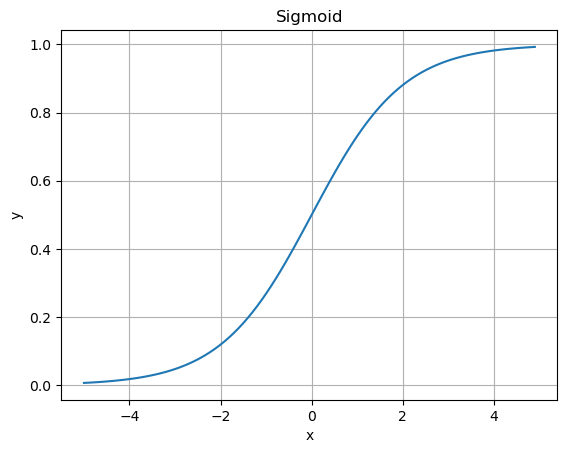

In [3]:
sigmoid = Sigmoid()
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid.forward(x)
plt.plot(x, y)
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

y가 0일 때 전파출력값은 0.5이다.

# 
#### 4-2번 문제 : 앞서 설계한 LinearModel, Sigmoid, MeanSquaredError 클래스를 사용하여 4번 문제와 같이 전파와 역전파 출력값을 과정마다 출력해보세요
1. 입력 x = 2
2. 정답 t = 1

In [4]:
x = 2
t = 1

import numpy as np
import matplotlib.pyplot as plt

class LinearModel:
    def __init__(self):
        self.w = np.random.randn(1)
        self.b = np.zeros(1)
        self.x = None
    
    def forward(self, x):
        self.x = x
        return self.w * x + self.b
    
    def backward(self, dout):
        dw = self.x * dout
        db = 1.0 * dout
        dx = self.w * dout
        return dx, dw, db

class Sigmoid :
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, y):
        self.x = y
        self.y = 1 / (1 + np.exp(-y))
        return self.y
    
    def backward(self, dout) :
        dx = dout * (1.0 - self.y) * self.y
        return dx

class MeanSquaredError:
    def __init__(self):
        self.t = None
        self.y = None
    
    def forward(self, y, t):
        self.t = t
        self.y = y
        return np.mean((y - t) ** 2)
    
    def backward(self, dout=1):
        dx = (self.y - self.t) * dout
        return dx

model = LinearModel()
loss = MeanSquaredError()
sigmoid = Sigmoid()

In [5]:
x = 2
t = 1

z1 = model.forward(x)
z2 = sigmoid.forward(z1)
loss_value = loss.forward(z2, t)

# 역전파
dz1 = loss.backward()
dz2 = sigmoid.backward(dz1)
dz, dw, db = model.backward(dz2)

# 가중치 업데이트
model.w -= lr * dw
model.b -= lr * db

print(f"Loss = {loss_value}, w = {model.w}, b = {model.b}")

Loss = 0.8161632517659322, w = [-1.03906679], b = [0.03941353]


# 
#### 4-3번 문제 : 이제 위와 같이 설계된 모델에 대해 100번 경사하강법 학습하는 코드를 작성해보세요.
1. 입력 x = 2, 정답 t = 1
2. 학습률 = 0.5
3. 매 경사하강법마다 예측값과, 손실값 출력

In [6]:
x = 2
t = 1
lr = 0.5

for i in range(1, 101):
    # 순전파
    z1 = model.forward(x)
    z2 = sigmoid.forward(z1)
    loss_value = loss.forward(z2, t)

    # 역전파
    dz1 = loss.backward()
    dz2 = sigmoid.backward(dz1)
    dz, dw, db = model.backward(dz2)

    # 가중치 업데이트
    model.w -= lr * dw
    model.b -= lr * db

    print(f"{i}회차 : Loss = {loss_value}, w = {model.w}, b = {model.b}")

1회차 : Loss = 0.7828761210171432, w = [-0.94888171], b = [0.08450607]
2회차 : Loss = 0.7391788211578809, w = [-0.84521564], b = [0.1363391]
3회차 : Loss = 0.6814568296512882, w = [-0.72630414], b = [0.19579485]
4회차 : Loss = 0.6060265495912439, w = [-0.59205537], b = [0.26291924]
5회차 : Loss = 0.5116323716992933, w = [-0.44638586], b = [0.33575399]
6회차 : Loss = 0.40419360206809424, w = [-0.29916328], b = [0.40936528]
7회차 : Loss = 0.2993186906621865, w = [-0.16360192], b = [0.47714596]
8회차 : Loss = 0.21398446230524884, w = [-0.04860337], b = [0.53464524]
9회차 : Loss = 0.15393969317235956, w = [0.04493786], b = [0.58141585]
10회차 : Loss = 0.11438444716362614, w = [0.1206366], b = [0.61926522]
11회차 : Loss = 0.08834380885561156, w = [0.18272226], b = [0.65030805]
12회차 : Loss = 0.07067918608985044, w = [0.23461099], b = [0.67625242]
13회차 : Loss = 0.058233736972118415, w = [0.27879195], b = [0.6983429]
14회차 : Loss = 0.04914018963768784, w = [0.31703895], b = [0.7174664]
15회차 : Loss = 0.04227876711948